# Questions
## From a dataset of reported type 1 crimes in Houston Texas from 2010- 2017

- Type of offense  max values
- Total crimes by week
- Total crimes by Month
- Total crimes by Year
- Total crimes by the Hour
- Total crimes by the top 10 Premise locations
- Total crimes by the top 10 (Police) Beat location
- Compare the two lowest offense types (rape & murder) by Year, Month, Weekday

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
sns.set_style("darkgrid")
sns.set_context("notebook")
current_palette = sns.color_palette("hls", 8)
import plot_func as pf

## Load dataset

In [2]:
df = pd.read_csv('crime_final_clean10_17.csv')
df.Date_Hour = pd.to_datetime(df.Date_Hour)  # datetime index
df = df.set_index('Date_Hour').sort_index(ascending=True)

In [3]:
df.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,
2010-01-01,10H10,500-599,EASTWOOD,Burglary,misc. business (non-specific),1,0,1,Friday,Jan,2010
2010-01-01,4F20,4800-4899,LAURELDALE,Aggravated Assault,residence/house,1,0,1,Friday,Jan,2010
2010-01-01,1A10,300-399,HAMILTON,Auto Theft,bar/night club parking lot,1,0,1,Friday,Jan,2010
2010-01-01,24C40,24000-24099,LAKE HOUSTON,Auto Theft,road/street/sidewalk,1,0,1,Friday,Jan,2010
2010-01-01,24C10,21700-21799,LAKEPOINT,Theft,residence/house,1,0,1,Friday,Jan,2010


## OffenseType

In [4]:
df.OffenseType.value_counts(dropna=False)

Theft                 552798
Burglary              181858
Auto Theft            100730
Aggravated Assault     82865
Robbery                76712
Rape                    6861
Murder                  1903
Name: OffenseType, dtype: int64

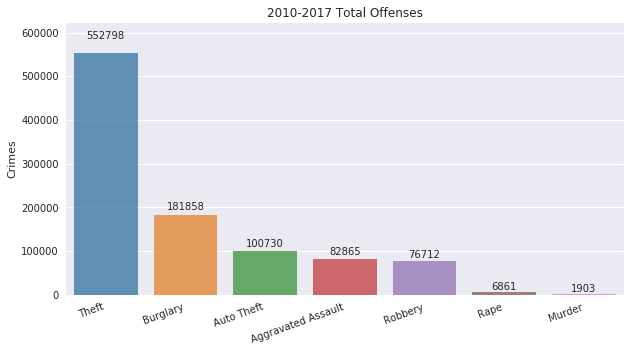

In [5]:
t='2010-2017 Total Offenses'
xlab = ''
ylab = 'Crimes'

pf.barplot(df,'OffenseType',t,xlab,ylab)

### OffenseType & Year

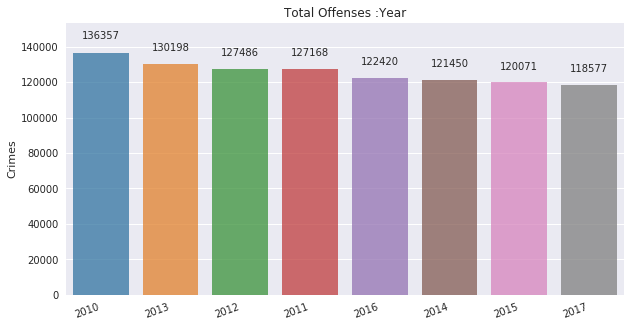

In [6]:
t='Total Offenses :Year'
xlab = ''
ylab = 'Crimes'

pf.barplot(df,'year',t,xlab,ylab)

### OffenseType & Month

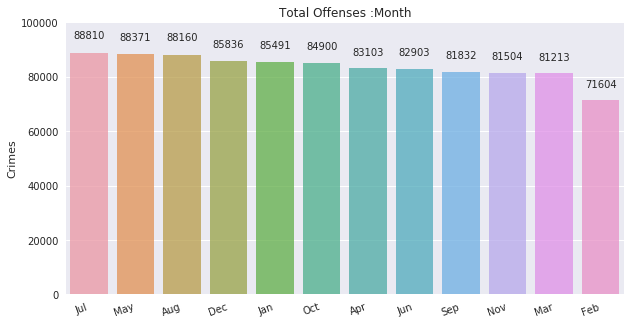

In [7]:
t='Total Offenses :Month'
xlab = ''
ylab = 'Crimes'

pf.barplot(df,'month',t,xlab,ylab)

### OffenseType & Weekday

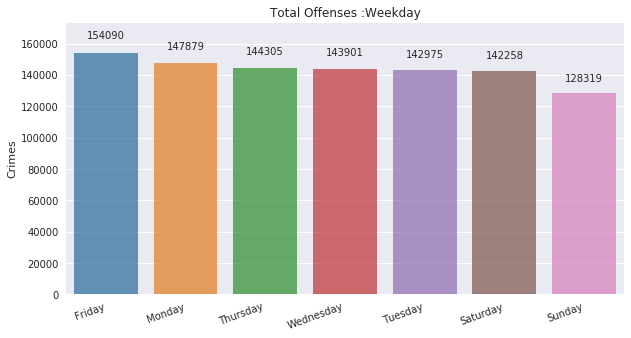

In [8]:
t='Total Offenses :Weekday'
xlab = ''
ylab = 'Crimes'

pf.barplot(df,'weekday',t,xlab,ylab)

### OffenseType & Hour

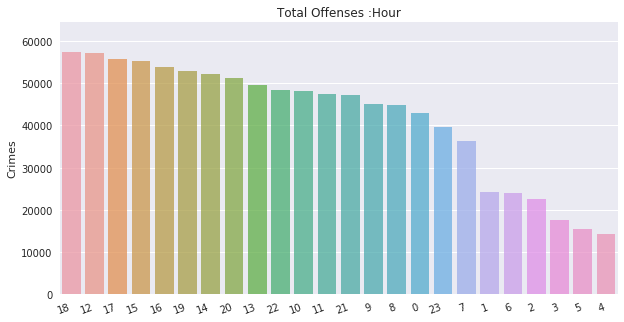

In [9]:
t='Total Offenses :Hour'
xlab = ''
ylab = 'Crimes'

pf.barplot(df,'Hour',t,xlab,ylab,nums=False)

### OffenseType & Day

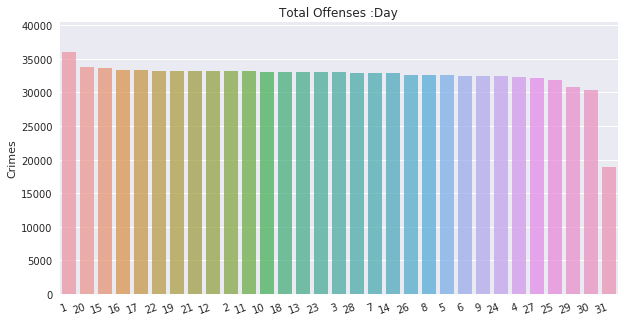

In [10]:
t='Total Offenses :Day'
xlab = ''
ylab = 'Crimes'

pf.barplot(df,'day',t,xlab,ylab,nums=False)

In [11]:
# list of top 10 premises, beats, street names
premises = [premise for premise in df['Premise'].value_counts().head(10).reset_index()['index']]
beats= [beat for beat in df['Beat'].value_counts().head(10).reset_index()['index']]
streets = [street for street in df['StreetName'].value_counts().head(10).reset_index()['index']]

### OffenseType & Beat (top 10)

In [12]:
beats_10 = df[df.Beat.isin(beats)]

beats_10.Beat.value_counts(dropna=False)

19G10    21422
12D10    21241
1A20     20938
6B60     20067
13D20    19135
3B10     18199
18F20    17541
17E10    17453
5F30     16491
18F30    16482
Name: Beat, dtype: int64

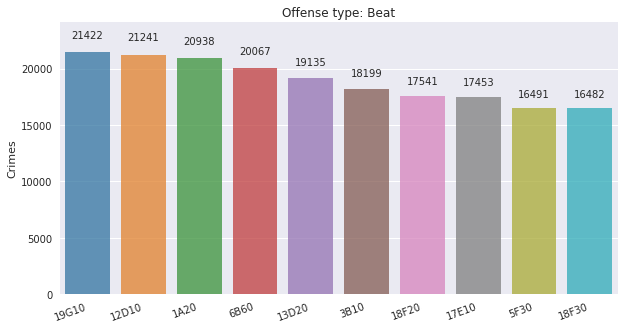

In [13]:
t='Offense type: Beat'
xlab = ''
ylab = 'Crimes'

pf.barplot(beats_10,'Beat',t,xlab,ylab)

### OffenseType & Premise (top 10)

In [14]:
premise_10 = df[df.Premise.isin(premises)]

premise_10.Premise.value_counts(dropna=False)

residence/house                      129165
apartment                            113813
apartment parking lot                111005
road/street/sidewalk                  81687
driveway                              52623
other parking lot                     44685
department/discount store             38116
no label                              33529
restaurant/cafeteria parking lot      32447
strip business center parking lot     18586
Name: Premise, dtype: int64

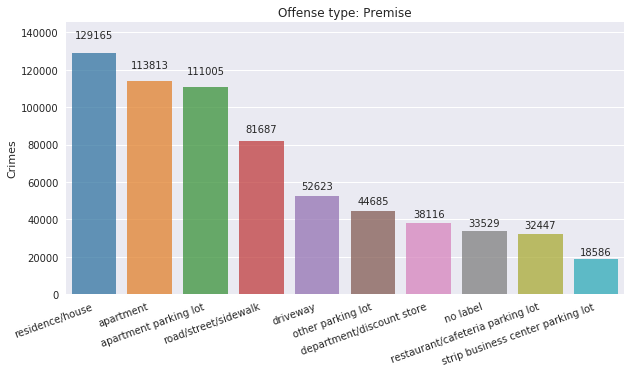

In [15]:
t='Offense type: Premise'
xlab = ''
ylab = 'Crimes'

pf.barplot(premise_10,'Premise',t,xlab,ylab)

### OffenseType & StreetName (top 10)

In [16]:
street_10 = df[df.StreetName.isin(streets)]
street_10.StreetName.value_counts(dropna=False)

WESTHEIMER    27553
GULF          14169
GESSNER       13922
NORTH         12660
RICHMOND      12383
KATY          10142
SOUTHWEST      9945
MAIN           9236
BISSONNET      9023
NORTHWEST      8860
Name: StreetName, dtype: int64

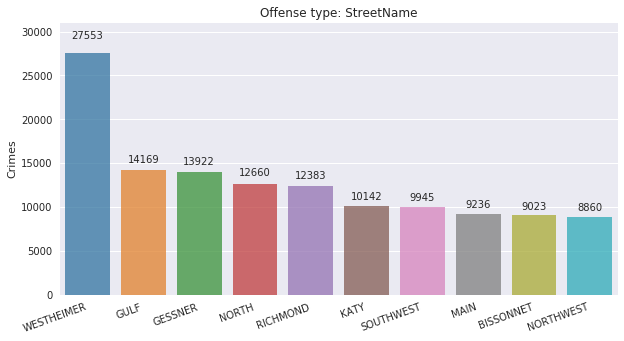

In [17]:
t='Offense type: StreetName'
xlab = ''
ylab = 'Crimes'

pf.barplot(street_10,'StreetName',t,xlab,ylab)

##  Comparison

In [18]:
# create a dataframe with just the two bottom offense types
dfrm = df.loc[(df.OffenseType =='Rape') | (df.OffenseType =='Murder')]

In [19]:
dfrm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8764 entries, 2010-01-01 00:00:00 to 2017-12-31 05:00:00
Data columns (total 11 columns):
Beat           8764 non-null object
BlockRange     8762 non-null object
StreetName     8764 non-null object
OffenseType    8764 non-null object
Premise        8764 non-null object
NumOffenses    8764 non-null int64
Hour           8764 non-null int64
day            8764 non-null int64
weekday        8764 non-null object
month          8764 non-null object
year           8764 non-null int64
dtypes: int64(4), object(7)
memory usage: 821.6+ KB


1470


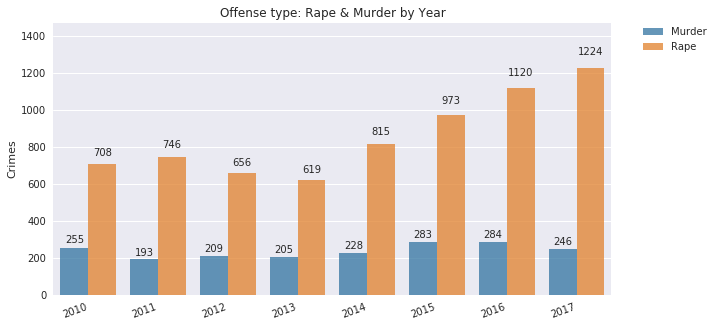

In [20]:
t='Offense type: Rape & Murder by Year'
xlab = ''
ylab = 'Crimes'

pf.couplot(dfrm,'year',t,xlab,ylab,nums=True)

807


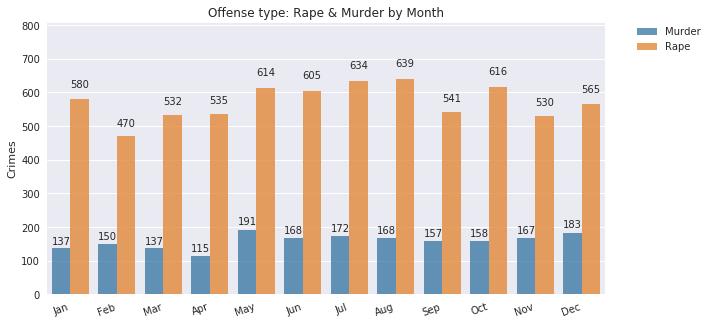

In [21]:
t='Offense type: Rape & Murder by Month'
xlab = ''
ylab = 'Crimes'

pf.couplot(dfrm,'month',t,xlab,ylab)

1484


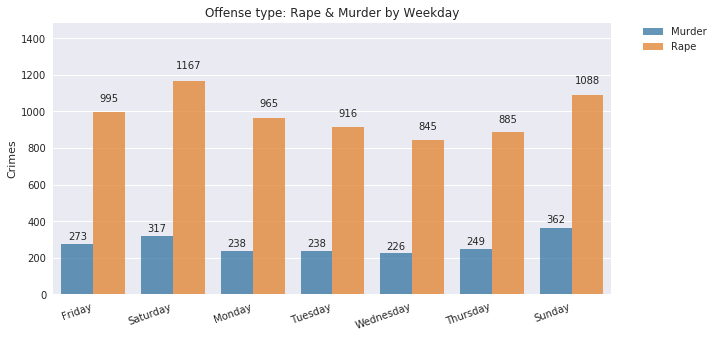

In [22]:
t='Offense type: Rape & Murder by Weekday'
xlab = ''
ylab = 'Crimes'

pf.couplot(dfrm,'weekday',t,xlab,ylab)

569


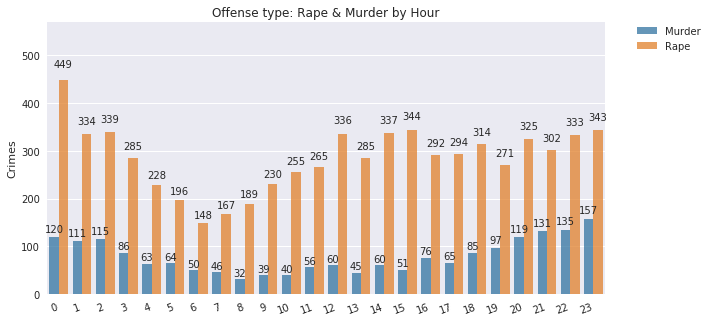

In [23]:
t='Offense type: Rape & Murder by Hour'
xlab = ''
ylab = 'Crimes'

pf.couplot(dfrm,'Hour',t,xlab,ylab)

## Timeline
## Compare Murder & Rape
- aggregate OffenseType
- plot timeline base on it

In [24]:
pt = pf.offense_df(df)
df_aa = df[pt['Aggravated Assault']]
df_b = df[pt['Burglary']]
df_t = df[pt['Theft']]
df_at = df[pt['Auto Theft']]
df_ra = df[pt['Rape']]
df_ro = df[pt['Robbery']]
df_mu = df[pt['Murder']]

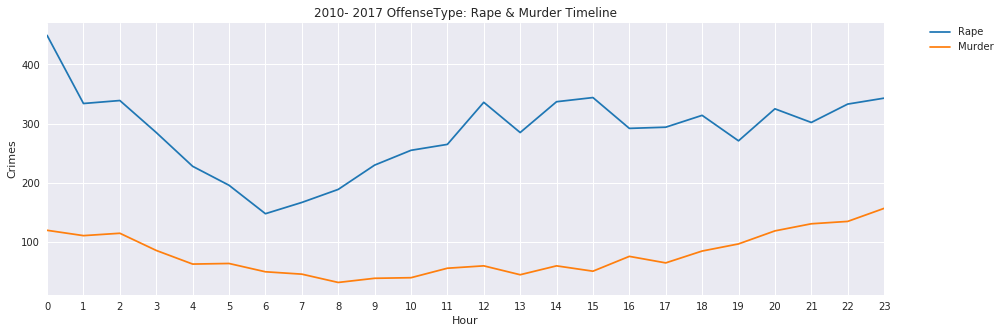

In [25]:
title = '2010- 2017 OffenseType: Rape & Murder Timeline'
xlab = 'Hour'
ylab= 'Crimes'
pf.time_plot2d(df_ra,'Rape',df_mu,'Murder','OffenseType',title,xlab,ylab)

## Timeline for all offenses

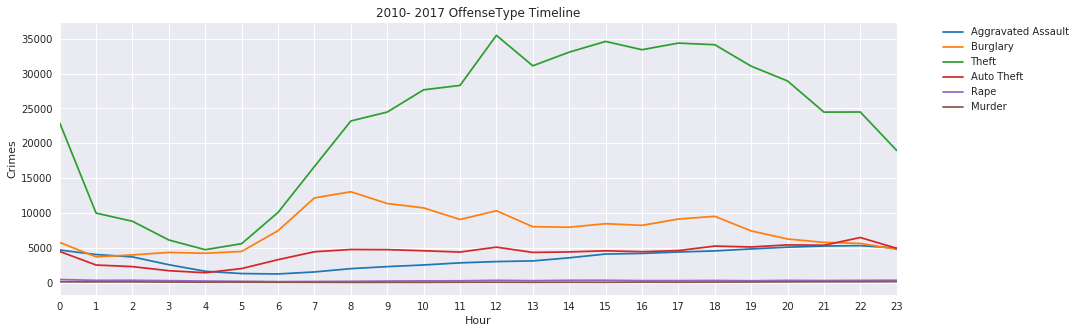

In [26]:
title = '2010- 2017 OffenseType Timeline'
xlab = 'Hour'
ylab= 'Crimes'
pf.time_plot6d(
            df_aa,'Aggravated Assault',
            df_b,'Burglary',
            df_t,'Theft',
            df_at,'Auto Theft',
            df_ra,'Rape',
            df_mu,'Murder','OffenseType',title,xlab,ylab)

# Answers
## From a dataset of reported type 1 crimes in Houston Texas from 2010- 2017

- Type of offense with the max values
    - Theft $552802$

- Total crimes by week
    - Friday has the most events with $552,802$
    - Sunday has the least with $128,320$
- Total crimes by Month
    - July  has the most events with $88,814$
    - February has the least with 7165
- Total crimes by Year
    - 2010 has the most with $136,357$
    - 2017 has the least with $118,580$
- Total crimes by the Hour ( has several data missing)
    - 6:00 pm is very popular with $4209$ events
    - 04:00 am had only $942$
    
- Total crimes by the top 10 Premise locations
    - Apartment and Apartment parking lot seem to be the most popular locations

- Total crimes by the top 10 (Police) Beat location
    - 19G10 with $21,422$
 
- Compare the two lowest offense types (rape & murder) by Year, Month, Weekday
    - rape was at its lowest on 2013 but it has double since  in only 4 years
    - Saturday and Sunday is the most popular date for rape to occur
    - Murder fluctuates between 200-300 every other year
    - Sunday is the most popular day for murder.